In [27]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random


(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


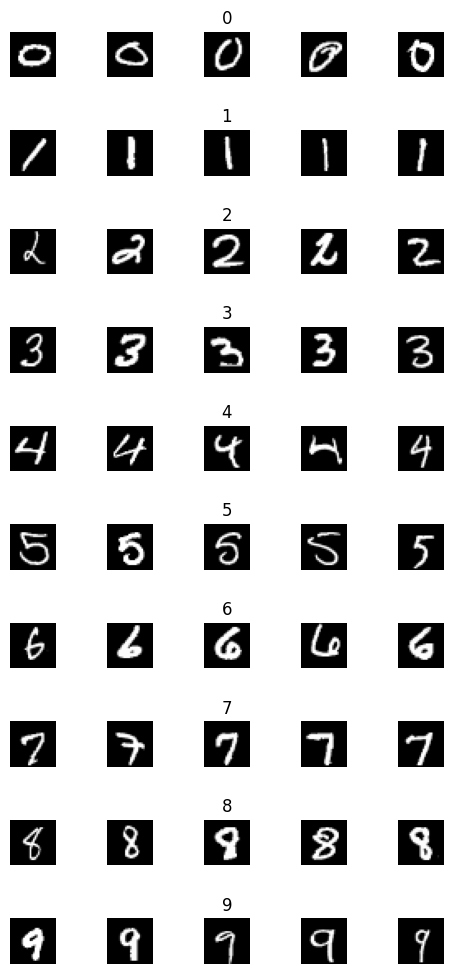

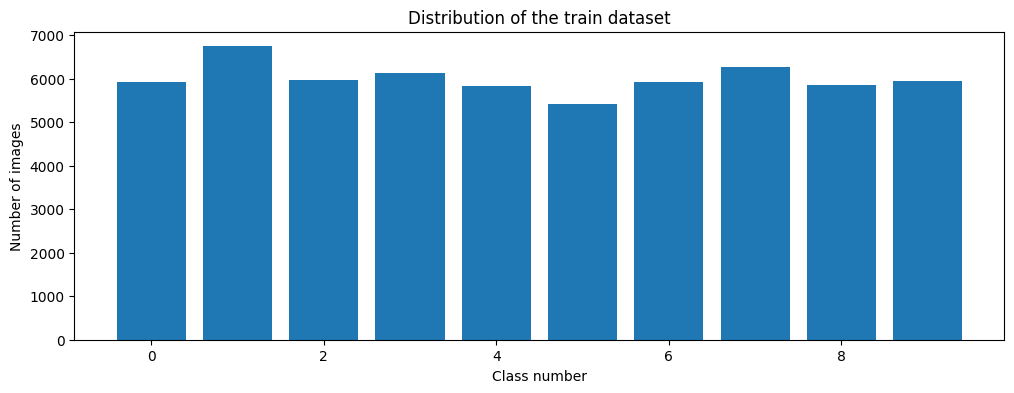

In [28]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [29]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))

  # Dropout randomly 'removes' fraction of nodes during training so nodal learning is more independent (i.e. generalizable)
  # to prevent overfitting
  # Generally they are useful in layers with higher number of parameters becuase they are more prone to 'memorize data' (i.e. overfit)
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [30]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              

In [31]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 2s 8ms/step - loss: 0.5164 - accuracy: 0.8372 - val_loss: 0.0934 - val_accuracy: 0.9755
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.1157 - accuracy: 0.9642 - val_loss: 0.0616 - val_accuracy: 0.9820
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0794 - accuracy: 0.9760 - val_loss: 0.0512 - val_accuracy: 0.9853
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 6/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 7/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 

<class 'list'>
Test score: 0.025265241041779518
Test accuracy: 0.9918000102043152


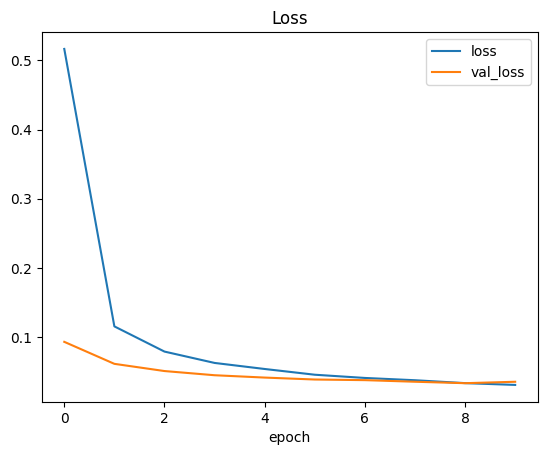

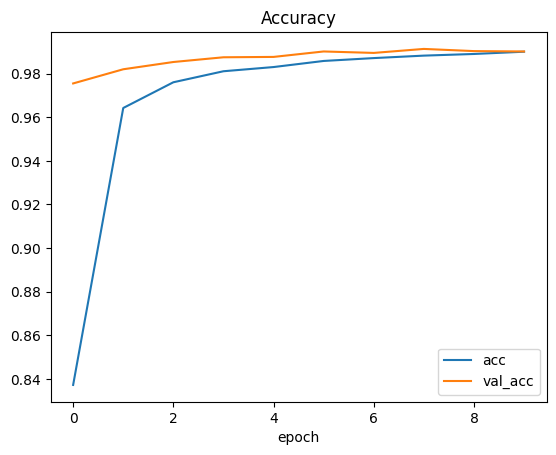

In [32]:
f1 = plt.figure()
f2 = plt.figure()

ax1 = f1.add_subplot(111)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['loss', 'val_loss'])
ax1.set_title('Loss')
ax1.set_xlabel('epoch')

ax2 = f2.add_subplot(111)
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['acc', 'val_acc'])
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


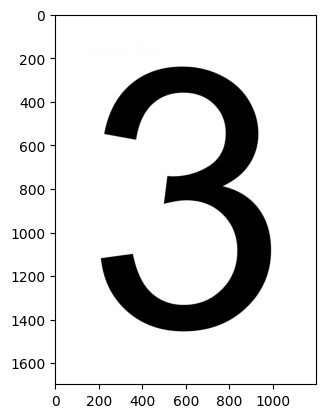

In [33]:
import requests
from PIL import Image

url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



(1697, 1200, 3)
(28, 28)
1/1 [==============================] - 0s 65ms/step
predicted digit: [3]


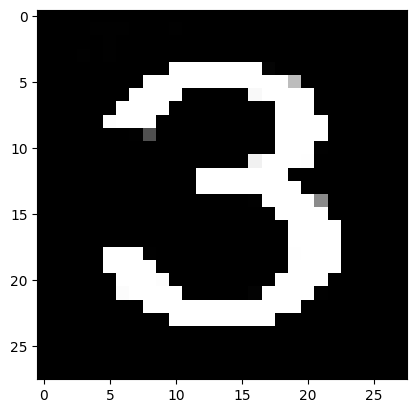

In [34]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)

# plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
image = cv2.bitwise_not(gray_scale) # swaps colors so white is foreground, black is background
plt.imshow(image, cmap=plt.get_cmap("gray"))

img = image/255
img = img.reshape(1, 28,28,1)

predict_x=model.predict(img)
prediction=np.argmax(predict_x,axis=1)
print("predicted digit:", str(prediction))

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.025265241041779518
Test accuracy: 0.9918000102043152


In [39]:
# conv layer 1
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
# conv layer 2
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 49ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


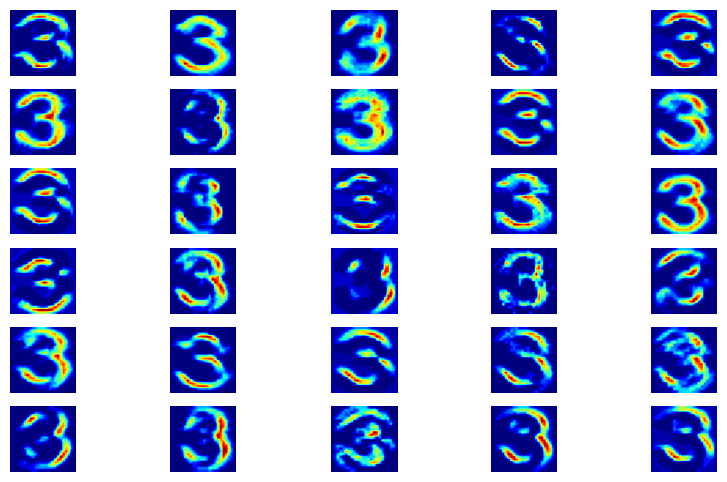

In [41]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')


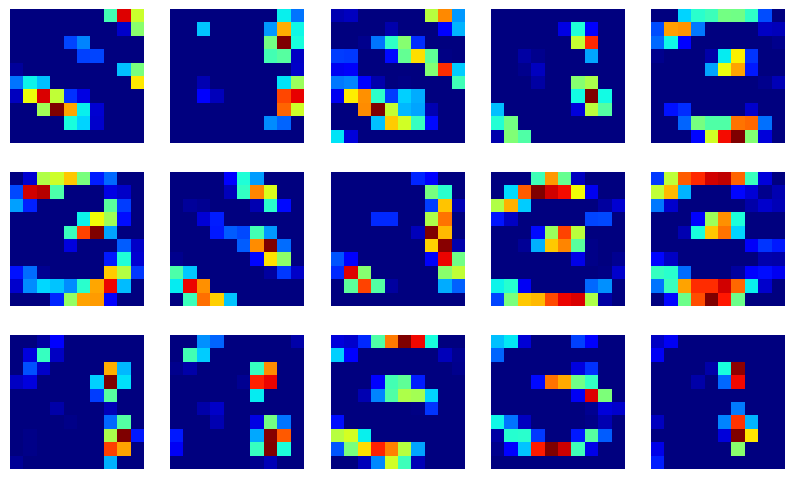

In [43]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
